In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guns-incident-data/Guns incident Data.csv


In [44]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## 2. Data Understanding and Collection:
-  Load the data.
-  Understand the data structure, types, and formats.

In [46]:
# Load the dataset
# Display the first few rows of the dataset
data = pd.read_csv('/kaggle/input/guns-incident-data/Guns incident Data.csv')
data.head()

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100,Other specified,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   S.No.               100798 non-null  int64  
 1   Year                100798 non-null  int64  
 2   Month               100798 non-null  int64  
 3   Date                100798 non-null  object 
 4   Reason              100798 non-null  object 
 5   Education           99376 non-null   object 
 6   Sex                 100798 non-null  object 
 7   Age                 100780 non-null  float64
 8   Race                100798 non-null  object 
 9   Hispanic            100798 non-null  int64  
 10  Place of incident   99414 non-null   object 
 11  Police involvement  100798 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [48]:
data.describe()

,S.No.,Year,Month,Age,Hispanic,Police involvement
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100798.000000
mean,50399.500000,2018.000357,6.567601,44.857601,114.179607,0.013909
std,29098.020554,0.816278,3.405609,19.496181,61.595734,0.117114
min,1.000000,2017.000000,1.000000,1.000000,100.000000,0.000000
25%,25200.250000,2017.000000,4.000000,28.000000,100.000000,0.000000
50%,50399.500000,2018.000000,7.000000,43.000000,100.000000,0.000000
75%,75598.750000,2019.000000,9.000000,59.000000,100.000000,0.000000
max,100798.000000,2019.000000,12.000000,108.000000,998.000000,1.000000


###  Data Understanding and Collection
**The dataset contains 100,798 entries with 12 columns. Here's a brief overview of each column:**

-  **S.No.:** Serial number (integer)
-  **Year:** Year of the incident (integer)
-  **Month:** Month of the incident (integer)
-  **Date:** Date of the incident (string)
-  **Reason:** Reason for the incident (string)
-  **Education:** Education level of the individual involved (string, has missing values)
-  **Sex:** Sex of the individual involved (string)
-  **Age:** Age of the individual involved (float, has missing values)
-  **Race:** Race of the individual involved (string)
-  **Hispanic:** Hispanic status coded as integers
-  **Place of incident:** Location of the incident (string, has missing values)
-  **Police involvement:** Whether police were involved, coded as 0 (No) or 1 (Yes)

## 3. Data Preprocessing:
-  **Handle missing values.**
-  **Remove duplicates.**
-  **Handle outliers.**

In [49]:
# Handle missing values by displaying the number of missing values in each column
missing_values = data.isnull().sum()

In [50]:
# Remove duplicates, if any
data_cleaned = data.drop_duplicates()

In [51]:
# Display the number of missing values and the shape of the dataset after removing duplicates
missing_values, data_cleaned.shape

(S.No.                    0
 Year                     0
 Month                    0
 Date                     0
 Reason                   0
 Education             1422
 Sex                      0
 Age                     18
 Race                     0
 Hispanic                 0
 Place of incident     1384
 Police involvement       0
 dtype: int64,
 (100798, 12))

**Missing Values:**

-  Education: 1422 missing values
-  Age: 18 missing values
-  Place of incident: 1384 missing values


**Duplicates:**
No duplicates were found.

**Handling Missing Values**
-  For Age, we'll fill missing values with the median age.
-  For Education and Place of incident, we'll fill missing values with the mode (most frequent value).

In [52]:
# Fill missing values for 'Age' with median
median_age = data_cleaned['Age'].median()
data_cleaned['Age'].fillna(median_age, inplace=True)

In [53]:
# Fill missing values for 'Education' and 'Place of incident' with mode
mode_education = data_cleaned['Education'].mode()[0]
mode_place_of_incident = data_cleaned['Place of incident'].mode()[0]

data_cleaned['Education'].fillna(mode_education, inplace=True)
data_cleaned['Place of incident'].fillna(mode_place_of_incident, inplace=True)

In [54]:
# Verify that there are no missing values left
missing_values_after = data_cleaned.isnull().sum()

# Display the number of missing values after imputation
missing_values_after

S.No.                 0
Year                  0
Month                 0
Date                  0
Reason                0
Education             0
Sex                   0
Age                   0
Race                  0
Hispanic              0
Place of incident     0
Police involvement    0
dtype: int64

### Handle Outliers

In [55]:
# Define a function to identify and remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in the 'Age' column
data_cleaned = remove_outliers(data_cleaned, 'Age')

In [56]:
# Display the shape of the dataset after removing outliers
data_cleaned.shape

(100797, 12)

## 4. Exploratory Data Analysis (EDA)
-  **UNIVARIATE ANALYSIS**

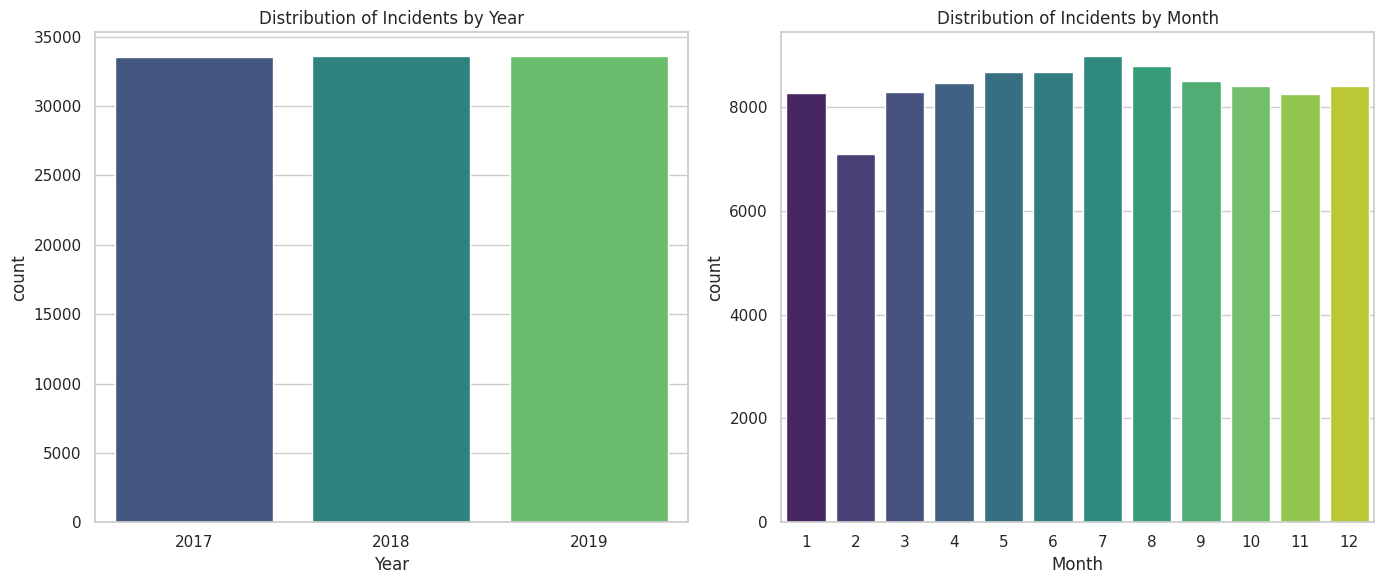

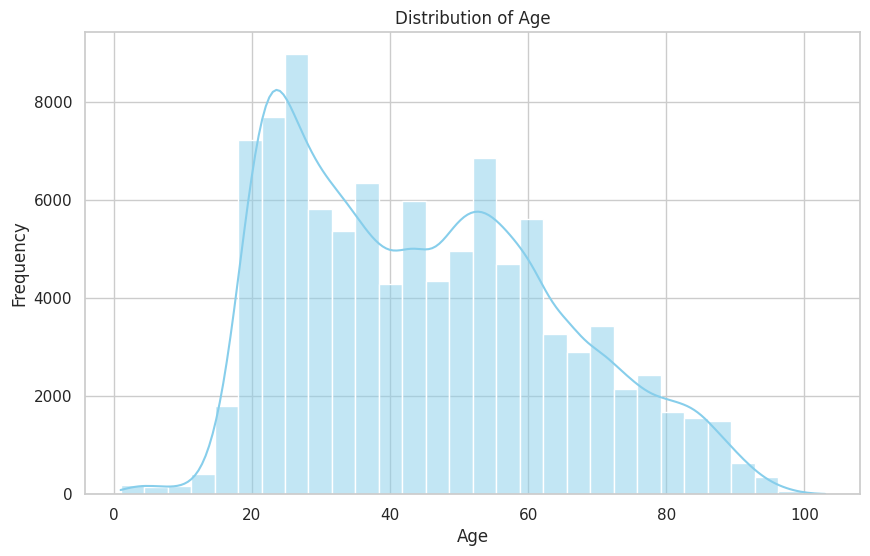

In [57]:
# Set plot style
sns.set(style='whitegrid')

# Distribution of incidents by Year and Month
plt.figure(figsize=(14, 6))

# Incidents by Year
plt.subplot(1, 2, 1)
sns.countplot(x='Year', data=data_cleaned, palette='viridis')
plt.title('Distribution of Incidents by Year')

# Incidents by Month
plt.subplot(1, 2, 2)
sns.countplot(x='Month', data=data_cleaned, palette='viridis')
plt.title('Distribution of Incidents by Month')

plt.tight_layout()
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

-  **Bivariate Analysis**

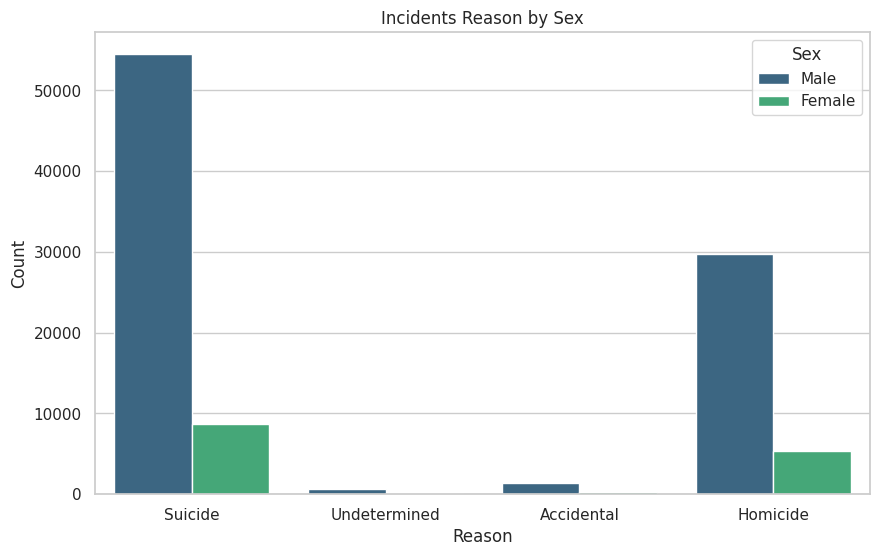

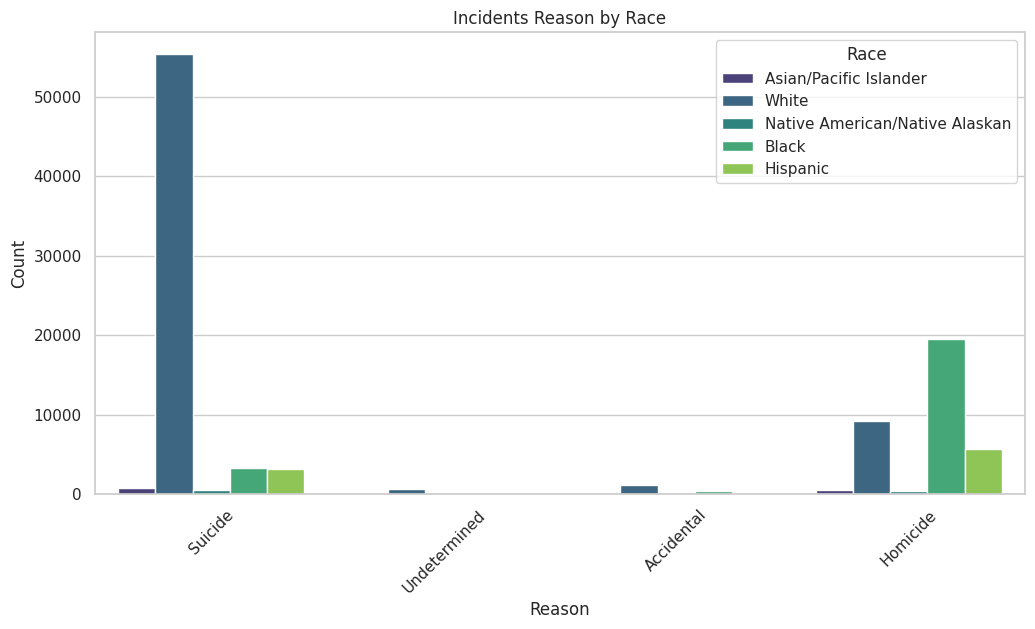

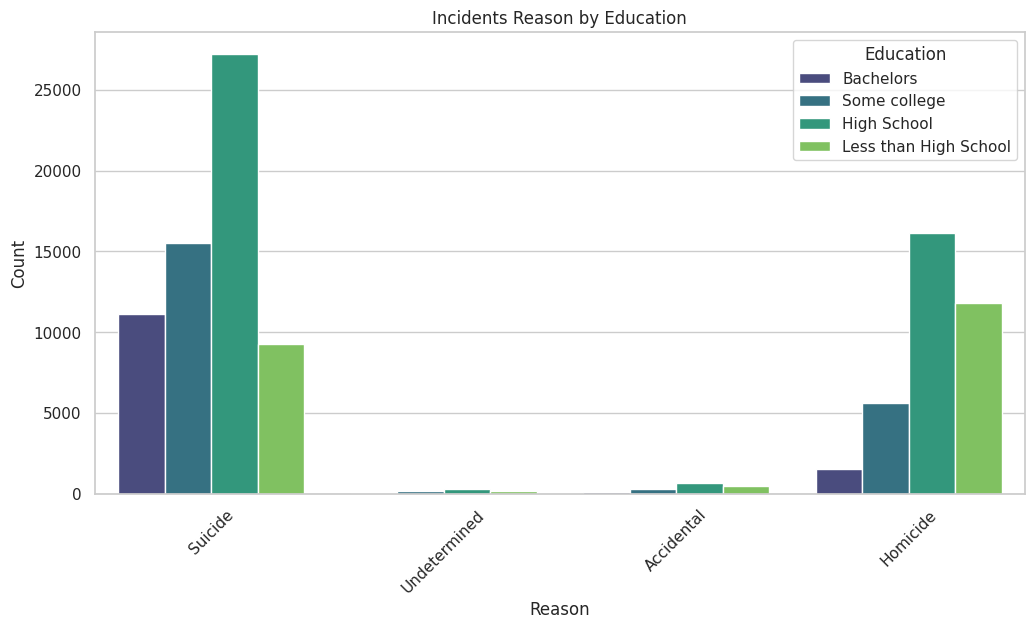

In [58]:
# Relationship between Reason and Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason', hue='Sex', data=data_cleaned, palette='viridis')
plt.title('Incidents Reason by Sex')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

# Relationship between Reason and Race
plt.figure(figsize=(12, 6))
sns.countplot(x='Reason', hue='Race', data=data_cleaned, palette='viridis')
plt.title('Incidents Reason by Race')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship between Reason and Education
plt.figure(figsize=(12, 6))
sns.countplot(x='Reason', hue='Education', data=data_cleaned, palette='viridis')
plt.title('Incidents Reason by Education')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

-   **Multivariate Analysis**

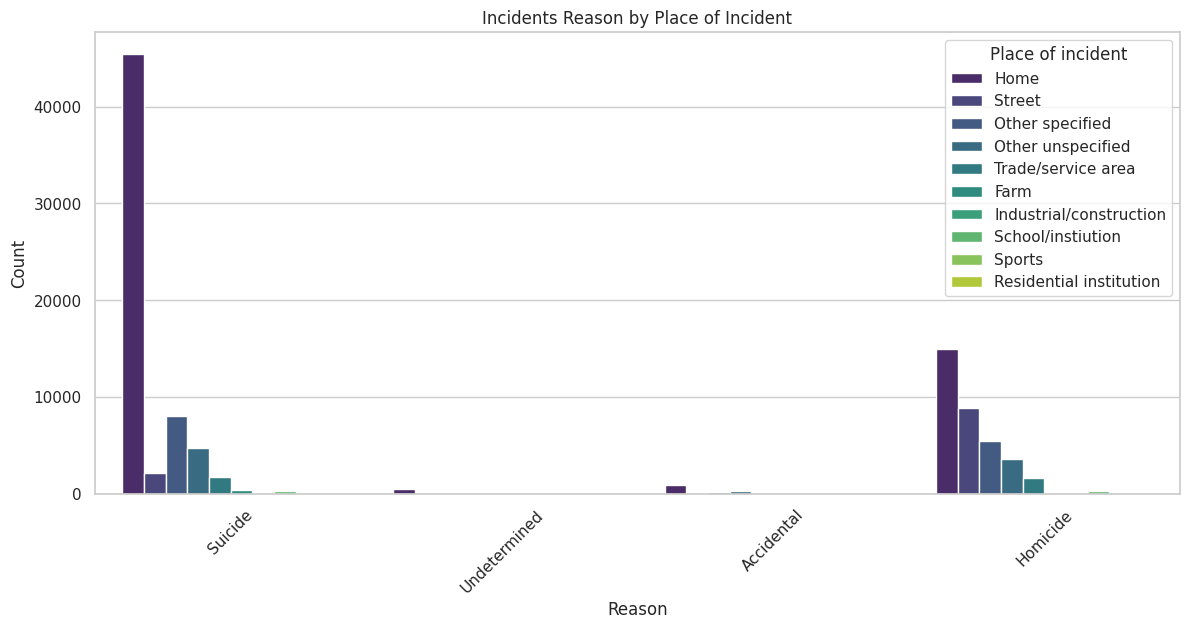

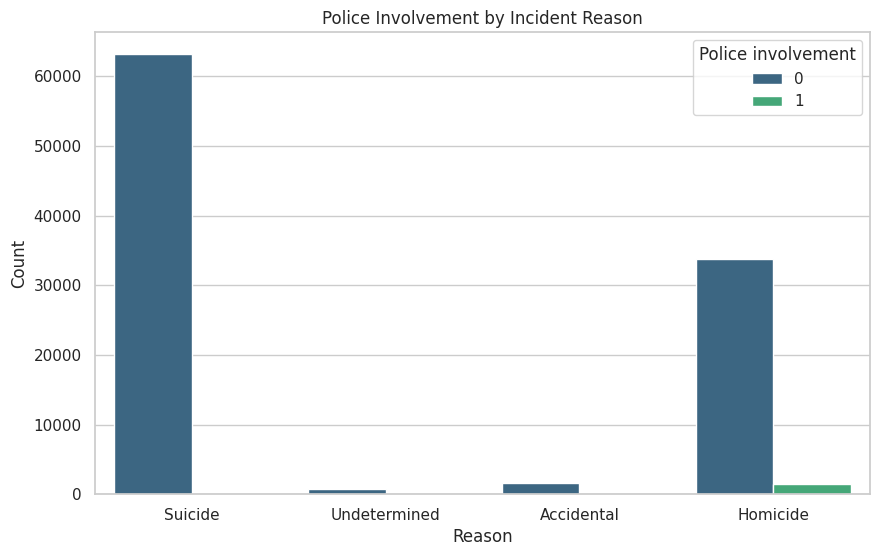

In [59]:
# Reason vs. Place of Incident
plt.figure(figsize=(14, 6))
sns.countplot(x='Reason', hue='Place of incident', data=data_cleaned, palette='viridis')
plt.title('Incidents Reason by Place of Incident')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Police involvement across different types of incidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason', hue='Police involvement', data=data_cleaned, palette='viridis')
plt.title('Police Involvement by Incident Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

## 5. Encode AND Scaling
**Convert categorical variables (Reason, Education, Sex, Race, Place of incident)**

In [60]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Reason', 'Education', 'Sex', 'Race', 'Place of incident']

# Apply label encoding to each categorical column
for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

# Display the transformed DataFrame
data_cleaned.head()


,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,2,0,1,35.0,0,100,1,0
1,2,2017,1,19-01-2017,2,3,0,22.0,4,100,8,0
2,3,2017,1,01-01-2017,2,0,1,61.0,4,100,3,0
3,4,2017,2,06-02-2017,2,0,1,65.0,4,100,1,0
4,5,2017,2,09-02-2017,2,1,1,32.0,4,100,3,0


In [61]:
# Checking unique values for categorical columns
unique_reason = data_cleaned['Reason'].unique()
unique_education = data_cleaned['Education'].unique()
unique_sex = data_cleaned['Sex'].unique()
unique_race = data_cleaned['Race'].unique()
unique_place_of_incident = data_cleaned['Place of incident'].unique()

unique_reason, unique_education, unique_sex, unique_race, unique_place_of_incident

(array([2, 3, 0, 1]),
 array([0, 3, 1, 2]),
 array([1, 0]),
 array([0, 4, 3, 1, 2]),
 array([1, 8, 3, 4, 9, 0, 2, 6, 7, 5]))

In [62]:
# Convert 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d-%m-%Y', errors='coerce')

# Descriptive statistics for numerical columns
descriptive_stats = data_cleaned.describe()

descriptive_stats

,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
count,100797.000000,100797.000000,100797.000000,100797,100797.000000,100797.000000,100797.000000,100797.000000,100797.000000,100797.000000,100797.000000,100797.000000
mean,50399.653740,2018.000357,6.567576,2018-07-02 03:42:02.967945472,1.626527,1.518230,0.856652,44.856643,3.065944,114.179747,2.630852,0.013909
min,1.000000,2017.000000,1.000000,2017-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000
25%,25200.000000,2017.000000,4.000000,2017-09-28 00:00:00,1.000000,1.000000,1.000000,28.000000,2.000000,100.000000,1.000000,0.000000
50%,50400.000000,2018.000000,7.000000,2018-07-03 00:00:00,2.000000,1.000000,1.000000,43.000000,4.000000,100.000000,1.000000,0.000000
75%,75599.000000,2019.000000,9.000000,2019-04-08 00:00:00,2.000000,2.000000,1.000000,59.000000,4.000000,100.000000,3.000000,0.000000
max,100798.000000,2019.000000,12.000000,2019-12-28 00:00:00,3.000000,3.000000,1.000000,103.000000,4.000000,998.000000,9.000000,1.000000
std,29098.123956,0.816282,3.405617,NaN,0.531551,0.967844,0.350429,19.493538,1.336090,61.596023,2.556096,0.117115


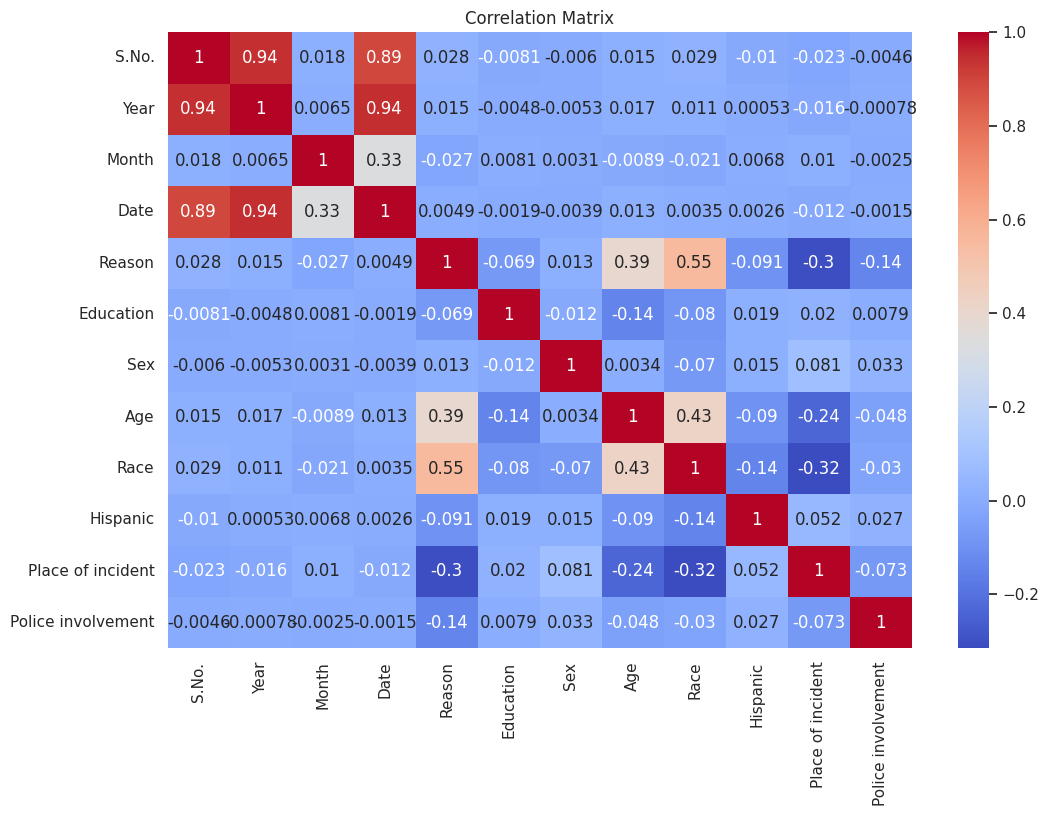

In [63]:
# Correlation matrix
corr_matrix = data_cleaned.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6. Hypothesis Testing

In [64]:
from scipy import stats

# Example hypothesis test: Is there a significant difference in age based on police involvement?
group1 = data_cleaned[data_cleaned['Police involvement'] == 1]['Age']
group2 = data_cleaned[data_cleaned['Police involvement'] == 0]['Age']

t_stat, p_val = stats.ttest_ind(group1, group2)
t_stat, p_val

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in age based on police involvement.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age based on police involvement.")

Reject the null hypothesis: There is a significant difference in age based on police involvement.


In [65]:
from scipy import stats

# T-test: Compare the average age of males and females
males = data_cleaned[data_cleaned['Sex'] == 0]['Age']
females = data_cleaned[data_cleaned['Sex'] == 1]['Age']

t_stat, p_val = stats.ttest_ind(males, females)
print(f"T-test results:\nT-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The average age of males and females is different.")
else:
    print("Fail to reject the null hypothesis: The average age of males and females is the same.")

# ANOVA: Compare the average age across different reasons for incidents
reasons = data_cleaned['Reason'].unique()
age_groups = [data_cleaned[data_cleaned['Reason'] == reason]['Age'] for reason in reasons]

f_stat, p_val = stats.f_oneway(*age_groups)
print(f"\nANOVA results:\nF-statistic: {f_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The average age is different for at least one reason.")
else:
    print("Fail to reject the null hypothesis: The average age is the same across all reasons.")

# Chi-square Test: Test the independence of incident reasons and sex
contingency_table = pd.crosstab(data_cleaned['Reason'], data_cleaned['Sex'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Test results:\nChi-square statistic: {chi2_stat}, P-value: {p_val}, Degrees of freedom: {dof}")

if p_val < 0.05:
    print("Reject the null hypothesis: Incident reason is not independent of sex.")
else:
    print("Fail to reject the null hypothesis: Incident reason is independent of sex.")

T-test results:
T-statistic: -1.0787860548311676, P-value: 0.28068569437092666
Fail to reject the null hypothesis: The average age of males and females is the same.

ANOVA results:
F-statistic: 7695.160255972817, P-value: 0.0
Reject the null hypothesis: The average age is different for at least one reason.

Chi-square Test results:
Chi-square statistic: 72.61089121868356, P-value: 1.1777373496041446e-15, Degrees of freedom: 3
Reject the null hypothesis: Incident reason is not independent of sex.


In [66]:
# Mann-Whitney U Test: Age Distribution for Incidents Involving Police vs. Not Involving Police
# Separate data by police involvement
police_involved_age = data_cleaned[data_cleaned['Police involvement'] == 1]['Age']
police_not_involved_age = data_cleaned[data_cleaned['Police involvement'] == 0]['Age']

# Perform Mann-Whitney U Test
u_stat, p_val = stats.mannwhitneyu(police_involved_age, police_not_involved_age)

print(f'Mann-Whitney U Test: U-statistic = {u_stat:.4f}, p-value = {p_val:.4f}')
if p_val < 0.05:
    print("Reject the null hypothesis: The age distribution is different for incidents involving police and not involving police.")
else:
    print("Fail to reject the null hypothesis: The age distribution is the same for incidents involving police and not involving police.")

# Kruskal-Wallis H Test: Age Distribution Across Different Places of Incident
# Separate data by places of incident
home_age = data_cleaned[data_cleaned['Place of incident'] == 0]['Age']
street_age = data_cleaned[data_cleaned['Place of incident'] == 1]['Age']
other_specified_age = data_cleaned[data_cleaned['Place of incident'] == 2]['Age']
other_unspecified_age = data_cleaned[data_cleaned['Place of incident'] == 3]['Age']
Trade_service_area_age= data_cleaned[data_cleaned['Place of incident'] == 4]['Age']
Farm_age= data_cleaned[data_cleaned['Place of incident'] == 5]['Age']
Industrial_construction_age= data_cleaned[data_cleaned['Place of incident'] == 6]['Age']
School_instiution_age= data_cleaned[data_cleaned['Place of incident'] == 7]['Age']
Sports_age= data_cleaned[data_cleaned['Place of incident'] == 8]['Age']
Residential_institution_age= data_cleaned[data_cleaned['Place of incident'] == 9]['Age']
# Perform Kruskal-Wallis H Test
h_stat, p_val = stats.kruskal(home_age, street_age, other_specified_age, other_unspecified_age)

print(f'Kruskal-Wallis H Test: H-statistic = {h_stat:.4f}, p-value = {p_val:.4f}')
if p_val < 0.05:
    print("Reject the null hypothesis: The age distribution is different for at least one place of incident.")
else:
    print("Fail to reject the null hypothesis: The age distribution is the same across all places of incident.")

# Chi-square Test for Independence: Education Level and Incident Reason
# Create contingency table
contingency_table_education_reason = pd.crosstab(data_cleaned['Education'], data_cleaned['Reason'])

# Perform Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_education_reason)

print(f'Chi-square Test for Independence (Education vs. Reason): chi2 = {chi2:.4f}, p-value = {p:.4f}')
if p < 0.05:
    print("Reject the null hypothesis: Education level is not independent of incident reason.")
else:
    print("Fail to reject the null hypothesis: Education level is independent of incident reason.")

Mann-Whitney U Test: U-statistic = 54557651.0000, p-value = 0.0000
Reject the null hypothesis: The age distribution is different for incidents involving police and not involving police.
Kruskal-Wallis H Test: H-statistic = 1457.1161, p-value = 0.0000
Reject the null hypothesis: The age distribution is different for at least one place of incident.
Chi-square Test for Independence (Education vs. Reason): chi2 = 7712.2473, p-value = 0.0000
Reject the null hypothesis: Education level is not independent of incident reason.


### BASED ON THE HYPOTHESIS TESTING BELOW ARE THE RECOMMENDATIONS AND STEPS NEED TO BE TAKEN BASED ON IT

**1. Significant Difference in Age Based on Police Involvement (Mann-Whitney U Test):**

**Recommendation:** Develop targeted interventions for age groups more likely to be involved in incidents with police. This could include community outreach programs, educational workshops, and partnerships with local organizations to address the specific needs of these age groups.

**Action Steps:**
-   Analyze the characteristics and behaviors of the age groups involved in incidents with police to understand underlying factors.
-   Implement age-specific community policing strategies to build trust and reduce incidents.

**2. No Significant Difference in Average Age Between Males and Females (T-test):**

**Recommendation:** Since the average age of males and females involved in incidents is the same, gender-neutral policies and programs can be developed. Focus on factors other than age and gender to create effective intervention strategies.

**Action Steps:**
-  Continue to collect data to monitor any changes in the age distribution by gender over time.
-  Focus on other demographic factors (e.g., education, location) that may influence incident rates.

**3. Significant Difference in Average Age Across Different Reasons for Incidents (ANOVA):**

**Recommendation:** Tailor prevention and intervention programs to specific age groups based on the reasons for incidents. For example, programs addressing "Suicide" incidents might focus on different age groups than those addressing "Accidents" or "Homicides."

**Action Steps:**
-  Develop specialized mental health and support services for age groups more likely to be involved in suicide incidents.
-  Create educational campaigns targeting younger age groups involved in accidental incidents to promote safety and awareness.

**4. Incident Reason Not Independent of Sex (Chi-square Test):**

**Recommendation:** Develop gender-specific strategies to address the different reasons for incidents. For example, if certain reasons are more prevalent among males, tailor interventions to address those specific issues.

**Action Steps:**
-  Conduct further analysis to identify the specific reasons for incidents that are more common among each gender.
-  Implement targeted awareness campaigns and support programs for each gender based on the identified reasons.

**5. Age Distribution Different for Incidents Involving Police and Not Involving Police (Mann-Whitney U Test):**

**Recommendation:** Police training programs should include age-specific components to better handle interactions with different age groups. Additionally, community engagement activities should be designed to address the needs of various age demographics.

**Action Steps:**
-  Provide police officers with training on de-escalation techniques tailored for different age groups.
-  Organize community events that bring together police and different age groups to build mutual understanding and trust.

**6. Age Distribution Different Across Places of Incident (Kruskal-Wallis H Test):**

**Recommendation:** Design location-specific intervention strategies. For example, incidents occurring at home may require different prevention approaches compared to those happening on the street or in other specified locations.

**Action Steps:**
-  Implement home safety and mental health programs to reduce incidents occurring at home.
-  Increase street patrols and public safety campaigns in areas with higher street incidents.
-  Collaborate with community organizations to address incidents in other specified locations.

**7. Education Level Not Independent of Incident Reason (Chi-square Test):**

**Recommendation:** Develop educational programs that address the specific reasons for incidents based on the education level of the individuals involved. Tailor content to be relevant and accessible to different educational backgrounds.

**Action Steps:**
-  Create educational materials that are easily understood and relevant to individuals with varying education levels.
-  Partner with educational institutions to integrate safety and awareness programs into their curricula.
-  Conduct workshops and seminars targeting specific educational groups to address the prevalent reasons for incidents.

## 7. Split the Data into training and test sets.

In [67]:
# Split data into features and target variable
X = data_cleaned.drop(['S.No.', 'Date', 'Police involvement'], axis=1)
y = data_cleaned['Police involvement']

# Define categorical and numeric features
categorical_features = ['Reason', 'Education', 'Sex', 'Race', 'Place of incident']
numeric_features = ['Age']

# Create preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression(random_state=42))])


In [69]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Reason', 'Education', 'Sex',
                                                   'Race',
                                                   'Place of incident'])])),
                ('model', LogisticRegression(random_state=42))])

In [70]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Reason',
                                                                          'Education',
                                                                          'Sex',
                                                                          'Race',
                                                                          'Place '
                                                                          'of '
                                                                          'incident'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__solver': ['liblinear', 'saga']},
             scoring='f1')

In [71]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'model__C': 0.01, 'model__solver': 'liblinear'}
Best Score: 0.0


In [72]:
# Validate the tuned model on test data
y_test_pred = grid_search.best_estimator_.predict(X_test)

In [73]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test ROC-AUC: {test_roc_auc}")


Test Accuracy: 0.986656746031746
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0
Test ROC-AUC: 0.5


In [74]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

In [75]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.986656746031746
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.5


In [76]:
# Detailed classification report
report = classification_report(y_test, y_test_pred, target_names=['No Police Involvement', 'Police Involvement'])
print(report)

# Feature importance analysis
best_model = grid_search.best_estimator_.named_steps['model']
importance = best_model.coef_[0]

# Get feature names from the preprocessor
onehot_columns = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([onehot_columns, numeric_features])

# Create a DataFrame for feature importance
feature_importance = pd.Series(importance, index=all_feature_names)
feature_importance.sort_values(ascending=False, inplace=True)

                       precision    recall  f1-score   support

No Police Involvement       0.99      1.00      0.99     19891
   Police Involvement       0.00      0.00      0.00       269

             accuracy                           0.99     20160
            macro avg       0.49      0.50      0.50     20160
         weighted avg       0.97      0.99      0.98     20160



In [77]:
# Feature importance analysis
best_model = grid_search.best_estimator_.named_steps['model']
importance = best_model.coef_[0]

In [78]:
# Get feature names from the preprocessor
onehot_columns = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([onehot_columns, numeric_features])

In [79]:
# Create a DataFrame for feature importance
feature_importance = pd.Series(importance, index=all_feature_names)
feature_importance.sort_values(ascending=False, inplace=True)


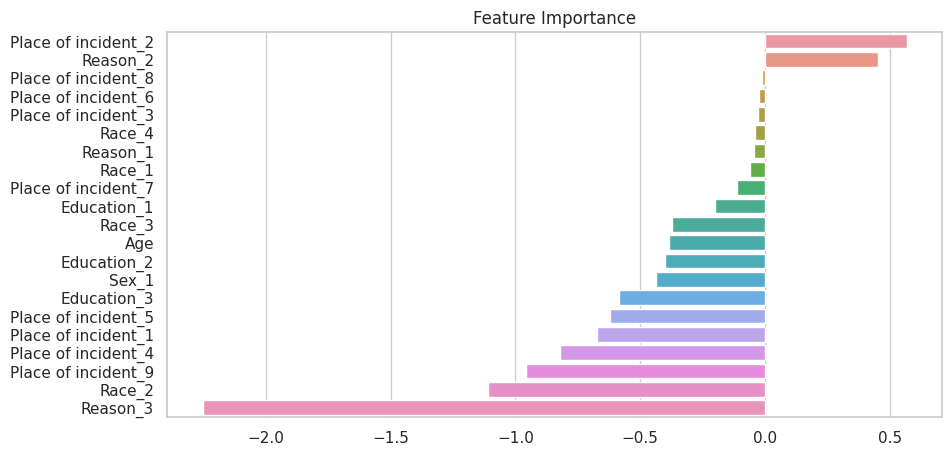

In [80]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()